# About Dataset

Customer Churn is one of the biggest challenges facing banks in the modern era, as the loss of customers leads to a negative impact on revenue and profitability. With the rapid development of technology and graphical analysis, it has become possible to use machine learning technologies to analyze customer data and predict their future behavior, which helps banks make proactive decisions to retain customers.

In this project, we aim to build a system based on machine learning to predict bank customer leakage using available customer data. This data includes detailed information such as age, gender, geographical location, activity, banking products used, and other financial and behavioral characteristics. By analyzing this data, the model can identify the most vulnerable customers to leakage, which enables the bank to effectively intervene and take appropriate actions to improve customer satisfaction and enhance their loyalty.

* **target :** This particular customer will leave bank or not.
* `RowNumber` : Row Number Of dataset.
* `CustomerId` : CustomerID is given.
* `Sutname` : Surname of the customer.
* `CreditScore` : Credit Score of customer.
* `Geography` : location of customer.
* `Gender` : Gender whether male or female.
* `Age` : Age of the customer.
* `Tenure` : From how many years customer is in bank.
* `Balance` : Average balance of customer.
* `NumOfProducts` : Number of bank product facilities customer is using.
* `HasCrCard` : Does the customer have a credit card (Credit Card) or not.  
* `IsActiveMember` : Is the client an active member of the bank
* `EstimatedSalary` : The estimated annual salary of the client.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset
dataset_path = "Churn_Modelling.csv"
dataset = pd.read_csv(dataset_path, index_col = 0)

In [3]:
# print 5 row from train dataset
dataset.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
3919,15740283,Ewing,850,France,Male,29,1,0.00,2,0,0,152996.89,0
9027,15807593,Berry,546,Spain,Female,36,7,85660.96,1,0,0,134778.01,0
2538,15723706,Abbott,573,France,Female,33,0,90124.64,1,1,0,137476.71,0
111,15803526,Eremenko,685,Germany,Male,30,3,90536.81,1,0,1,63082.88,0
6125,15643359,Carter,736,Spain,Male,32,7,0.00,1,0,1,79082.62,0


In [4]:
# print info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


**If using the XGBOOST algorithm, there is no need to convert categorical data to numerical data. However, if using other algorithms (e.g., Decision Tree, Random Forest, Logistic Regression), it is necessary to convert categorical data to numerical data.**

In [5]:
# print describe of dataset
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# print shape of dataset
dataset.shape

(10000, 13)

In [7]:
# check quality and preprocessing if find any cell contains missing value.
count_missing_value = dataset.isnull().sum()
print(f"Count the cells of missing value : \n{count_missing_value}\n")

Count the cells of missing value : 
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



In [8]:
# check quality and preprocessing if find any rows to duplicates
count_duplicates = dataset.duplicated().sum()
print(f"Count the duplicate rows : {count_duplicates}\n")

Count the duplicate rows : 0



In [9]:
# check quality : class inbalance - find the radio between 2 class "balance & Unbalance"
num_stayed = dataset["Exited"].value_counts()[0]  # Customers who stayed (Exited = 0)
num_churned = dataset["Exited"].value_counts()[1]  # Customers who churned (Exited = 1)
# Calculate the percentage of each class relative to the total dataset
percentage_stayed = (num_stayed / len(dataset)) * 100
percentage_churned = (num_churned / len(dataset)) * 100
# Print the results with descriptive messages
print(f"Number of customers who stayed: {num_stayed} | {percentage_stayed:.2f}% of the dataset")
print(f"Number of customers who churned: {num_churned} | {percentage_churned:.2f}% of the dataset")

Number of customers who stayed: 7963 | 79.63% of the dataset
Number of customers who churned: 2037 | 20.37% of the dataset


**Handling Imbalance in Classes during Model Building**

* To handle class imbalance, we first need to identify the extent of the imbalance. In our dataset, we have:
- Number of customers who stayed: 7963 (79.63% of the dataset)
- Number of customers who churned: 2037 (20.37% of the dataset)

**This imbalance can affect the performance of our machine learning models, so we need to consider techniques such as resampling, using different evaluation metrics, or applying algorithms that handle imbalance well.**

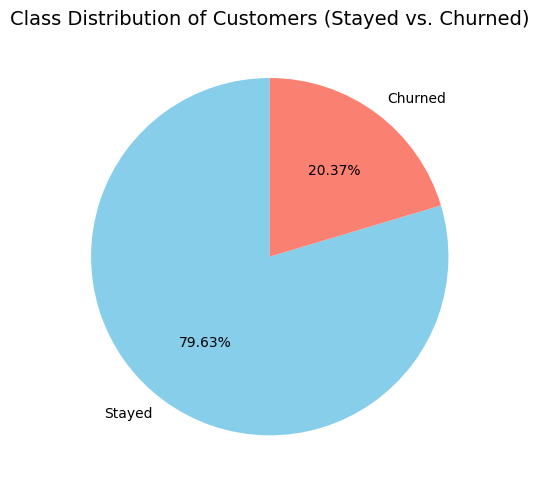

In [10]:
# Prepare data for visualization
labels = ['Stayed', 'Churned']
counts = [num_stayed, num_churned]
percentages = [(num_stayed / len(dataset)) * 100, (num_churned / len(dataset)) * 100]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'salmon'])

# Add title
plt.title('Class Distribution of Customers (Stayed vs. Churned)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# check Customer ID is unique or not
print(f"Customer Is Unique : {dataset.index.is_unique}")

Customer Is Unique : True


**According to the bank's policy, assuming that from 700 upwards, it is good, and from 550 to less than 700, a normal "normal" division is less, then it is bad**

In [12]:
# Categorize CreditScore to simplify analysis
def categorize_credit_score(score):
    if score >= 700:
        return 'Good'
    elif score >= 550:
        return 'Natural'
    else:
        return 'Poor'

dataset['CreditScoreCategory'] = dataset['CreditScore'].apply(categorize_credit_score)
dataset.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory
RowNumber,,,,,,,,,,,,,,
3911,15698716,Baker,620,France,Female,70,3,87926.24,2,1,0,33350.26,1,Natural
1120,15585241,Butcher,756,Spain,Male,29,2,117412.19,2,1,0,4888.91,0,Good
5869,15663817,Y?an,713,France,Male,46,5,0.00,1,1,1,55701.62,0,Good
5969,15603743,Tai,526,France,Male,28,1,112070.44,1,0,1,126281.83,0,Poor
7811,15771059,Welch,756,Germany,Female,34,2,148200.72,1,0,0,194584.48,0,Good


* **What are the main factors affecting the departure of the client (Exited)**
* **Analysis of the impact of various characteristics such as CreditScore, Age, Balance, NumOfProducts, IsActiveMember, EstimatedSalary on the likelihood of a client leaving.**
* **This analysis helps in designing customer retention strategies.**

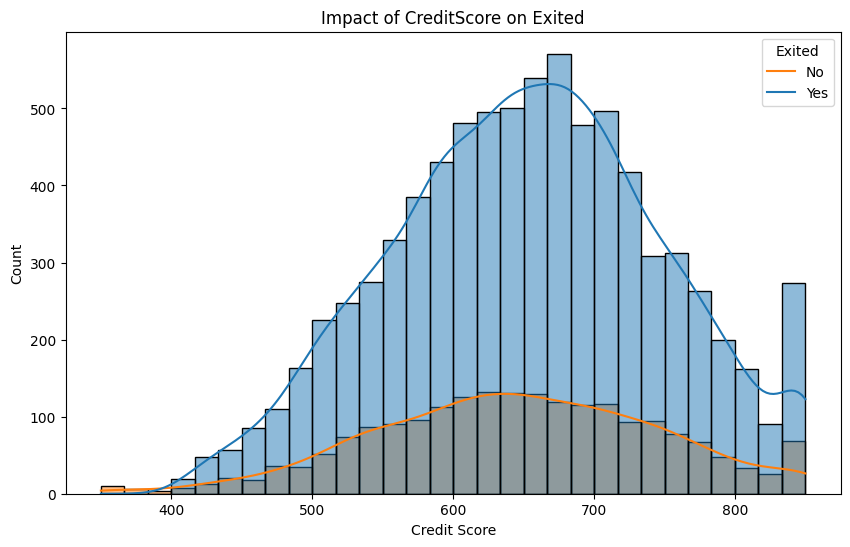

In [13]:
# Analysis of the relationship between the credit score (CreditScore) and the exited
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='CreditScore', hue='Exited', kde=True, bins=30)
plt.title('Impact of CreditScore on Exited')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

* **Note: customers with low credit scores (less than 600) leave with a higher percentage compared to those in the higher category (700+).**
* **Resolution: focus on improving the experience of customers with medium and low credit scores, such as providing financial advice or incentive programs.**

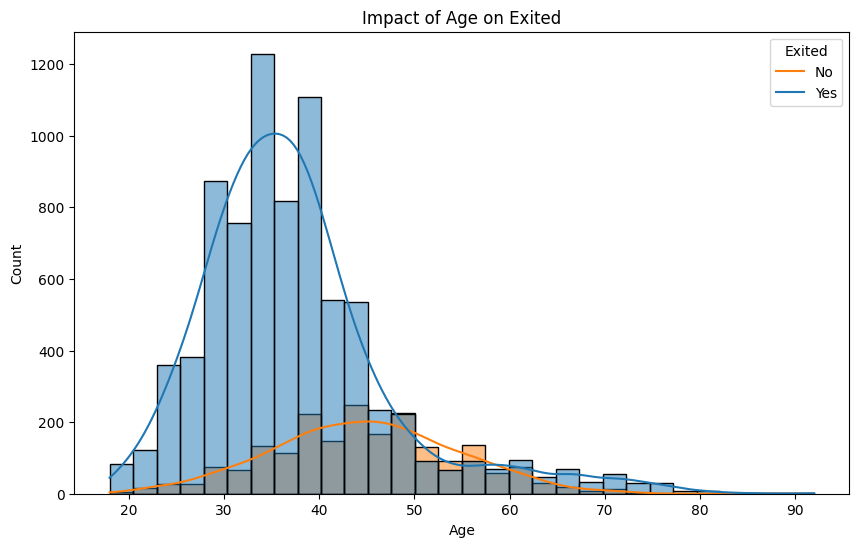

In [14]:
# Analysis of the relationship between age and exited
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Impact of Age on Exited')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

* **Note: the percentage of departures increases with age, especially after the age of 40.**
* **Decision: design customized programs for older customers, such as savings products or retirement plans to motivate their survival.**

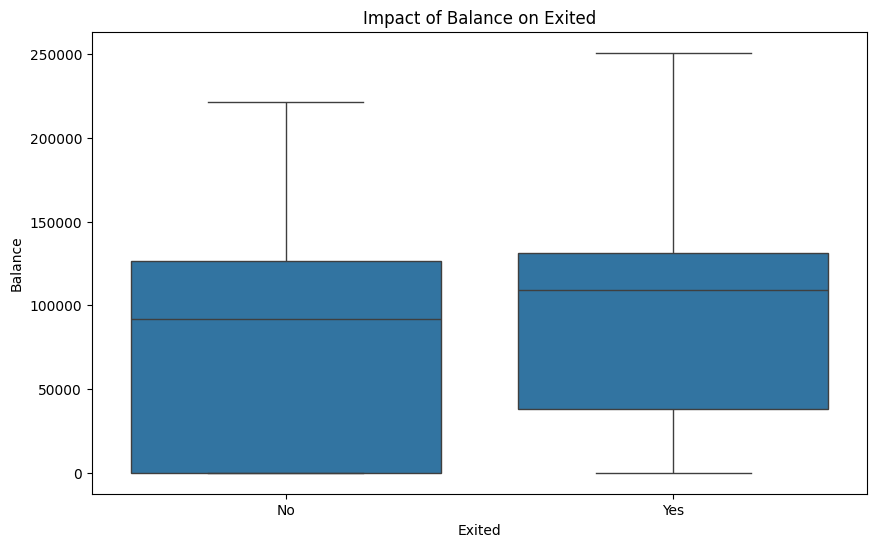

In [15]:
# Analysis of the relationship between balance and exited
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Exited', y='Balance')
plt.title('Impact of Balance on Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* **Note: customers with a high balance tend to leave the bank more often than customers with a low balance.**
* **Decision: improve investment offers or offer higher benefits to clients with high balances.**

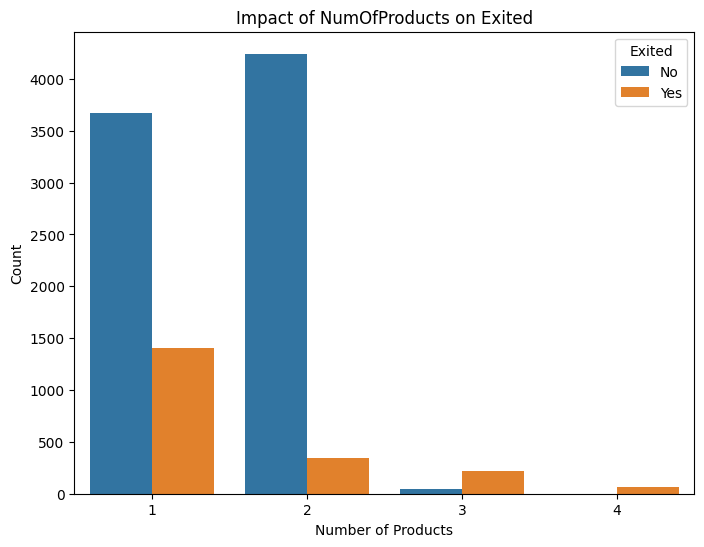

In [16]:
# Analysis of the relationship between the number of products (NumOfProducts) and exited
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='NumOfProducts', hue='Exited')
plt.title('Impact of NumOfProducts on Exited')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

* **Note: customers who own one product are most likely to leave.**
* **Resolution: encourage customers to increase the use of products by offering incentives when using more than one product.**

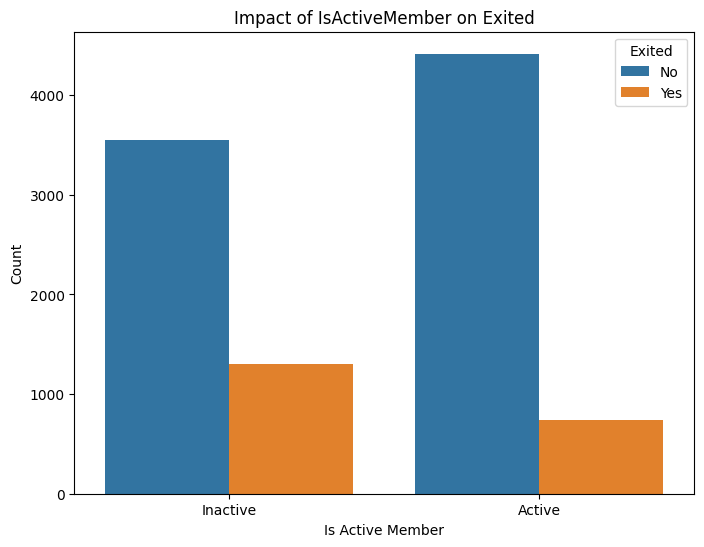

In [17]:
# Analysis of the relationship between the activity (IsActiveMember) and exited
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='IsActiveMember', hue='Exited')
plt.title('Impact of IsActiveMember on Exited')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

* **Note: inactive clients leave at a higher percentage compared to active ones.**
* **Decision: implementation of interactive programs to motivate inactive customers to participate more with the bank.**

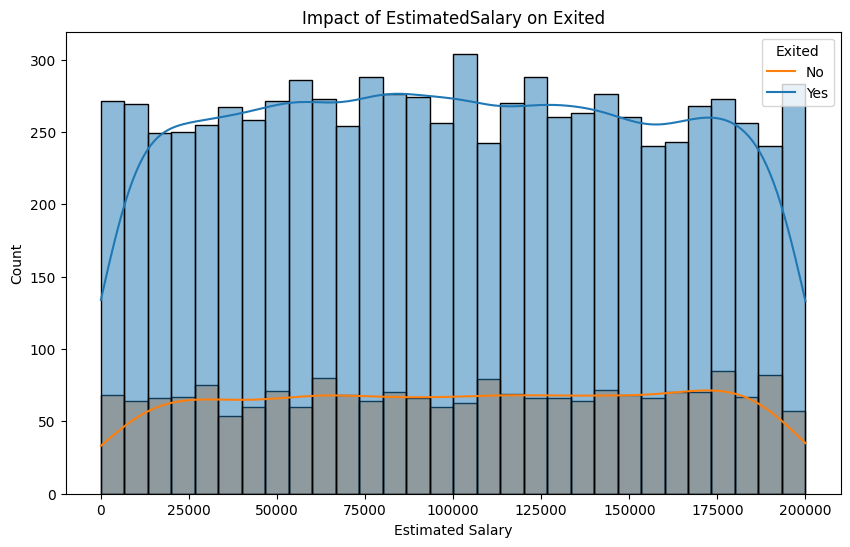

In [18]:
# Analysis of the relationship between estimated salary (EstimatedSalary) and exited
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='EstimatedSalary', hue='Exited', kde=True, bins=30)
plt.title('Impact of EstimatedSalary on Exited')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

* **Note: there is no obvious effect of the estimated salary level on departure, as the departure percentages are distributed almost equally at all salary levels.**
* **Decision: focus on other characteristics, such as activity and number of products, when developing customer retention strategies.**

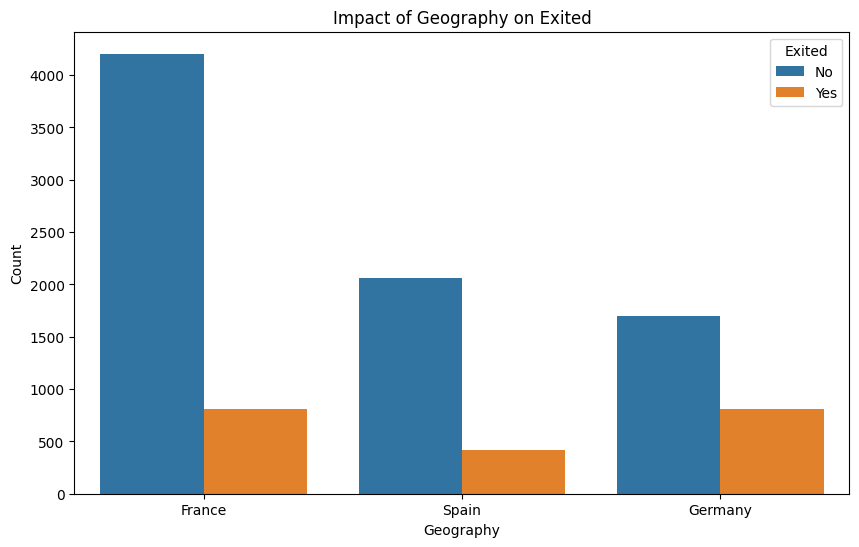

In [19]:
# Analysis of the impact of Geography on Exited
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Geography', hue='Exited')
plt.title('Impact of Geography on Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

geography_analysis = dataset.groupby(['Geography', 'Exited'])['CustomerId'].count().reset_index()
geography_pivot = geography_analysis.pivot(index='Geography', columns='Exited', values='CustomerId')
geography_pivot['ExitRate'] = geography_pivot[1] / (geography_pivot[0] + geography_pivot[1]) * 100

**Observation:**

* **In France (France):** most customers stayed with the bank, the percentage of departures is low compared to other regions.
* **In Spain (Spain):** the percentage of customers leaving is average, but it is less pronounced compared to Germany.
* **In Germany (Germany):** the percentage of departures is the highest compared to other regions, which indicates a possible problem with services or interaction with customers.

**Decision:**

*  **In Germany:** improving the services and offers offered to customers to reduce departure rates, such as offering competitive advantages or loyalty programs.
* **In France:** maintaining the quality of services and the continuity of Special Offers to maintain customer loyalty.
* **In Spain:** improving customer interaction through targeted support programs to prevent departures.

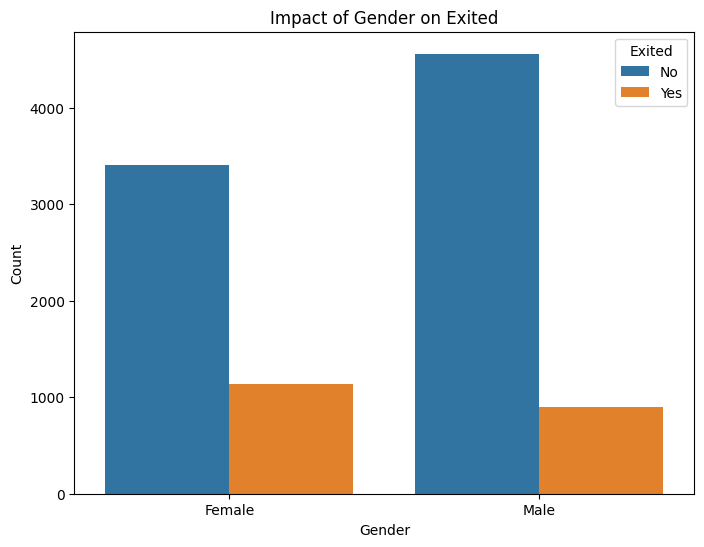

In [20]:
# The relationship between gender and the client's exit status
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Gender', hue='Exited')
plt.title('Impact of Gender on Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

**Observation:**

* The percentage of departures is higher among female customers compared to male ones.
* Male clients show a higher retention rate with the bank.

**Decision:**

* Improve interaction with female clients by customizing services and programs that suit their needs.
* Study the reasons that lead to females leaving more and work on addressing them through questionnaires or direct interaction.
* Promote retention strategies for female clients by offering offers or incentives specifically targeted at them.

In [21]:
# Drop specific columns
dataset = dataset.drop(["CustomerId", "Surname", "CreditScoreCategory"], axis = 1)

In [22]:
# Ensure column names are stripped of any leading/trailing spaces
dataset.columns = dataset.columns.str.strip()

# Convert object type columns to category type
for col in dataset.select_dtypes(include="object").columns:
    dataset[col] = dataset[col].astype("category")

In [23]:
x = dataset.drop("Exited", axis = 1)
y = dataset["Exited"]

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
# import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score 

In [26]:
# train_dmatrix = xgb.DMatrix(data = x_train, label = y_train, enable_categorical = True)
# test_dmatrix = xgb.DMatrix(data = x_test, label = y_test, enable_categorical = True)

In [33]:
params_grid = {
    "n_estimators": [100],
    "learning_rate": [0.1],
    "max_depth": [8, 10],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8],
    "min_child_weight": [1, 3],
    "gamma": [0.1, 0.3],
    "reg_alpha": [0, 0.01],
    "reg_lambda": [1, 1.5]
}

In [34]:
xgb = XGBClassifier(random_state=42, enable_categorical=True, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=params_grid, cv=5, verbose=2, n_jobs=-1)

In [35]:
# Fitting the GridSearchCV
print("Starting Grid Search...")
grid_search.fit(x_train, y_train)

Starting Grid Search...
Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.1, 0.3],
                         'learning_rate': [0.1], 'max_depth': [8, 10],
                         'min_child_weight': [1, 3], 'n_estimators': [100],
                         'reg_alpha': [0, 0.01], 'reg_lambda': [1, 1.5],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [36]:
# Extracting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [37]:
# Evaluate the model on the test set
y_pred = best_model.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8655
Precision: 0.7296296296296296
Recall: 0.5012722646310432
F1 Score: 0.5942684766214178


In [38]:
# Saving all results to a CSV file
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv("grid_search_results_xgboost.csv", index=False)
print("Grid Search results saved to 'grid_search_results_xgboost.csv'")

Grid Search results saved to 'grid_search_results_xgboost.csv'
